Признаки: 
1. satisfaction_level​ - Уровень удовлетворенности работой
2. Last_evaluation ​- Время с момента последней оценки в годах 
3. number_projects​ - Количество проектов, выполненных за время работы 
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц 
5. time_spend_company​ - Стаж работы в компании в годах 
6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left​ - уволился ли сотрудник
8. promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9. department ​- отдел в котором работает сотрудник
10. salary​ - относительный уровень зарплаты

1. Загрузите файл HR.csv в pandas dataframe 5

In [19]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение) 10

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
df['satisfaction_level'].median()

0.64

In [26]:
lst = list(df)
print('Медиальные значения:')
df.loc[:, lst].median()

Медиальные значения:


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [34]:
print('Модальные значения:')
df.loc[:, lst].mode()

Модальные значения:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Предварительные выводы.
Среднее количество часов на рабочем месте в месяц имеет 2 моды - 135 и 156 часов.
В основном сотрудники чаще всего недовольны, оценка работы происходит чаще примерно всего раз в полгода. Сотрудники чаще всего ведут по 4 проекта. Стаж работ 3 года, т.е. компания новая, т.к. увольнения также не модальны. Чаще всего инцидентов на работе не происходит. Сотрудников редко повышают, Больше всего сотрудников проходят через в департамент продаж, уровень ЗП чаще всего низкий.

3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименеескоррелированные переменные. 10

<AxesSubplot:>

<Figure size 864x648 with 0 Axes>

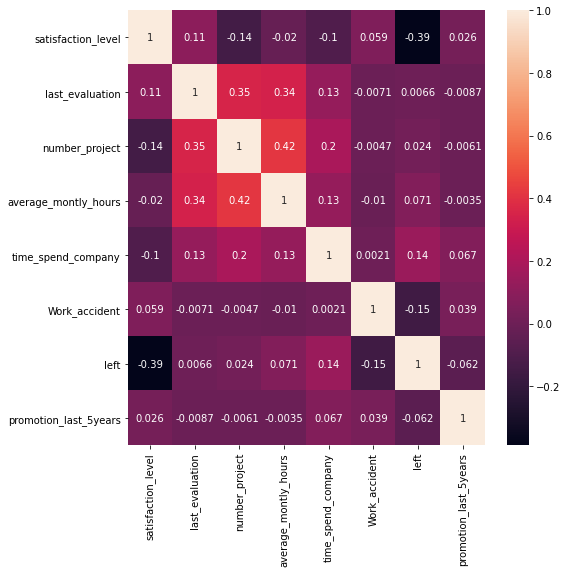

In [44]:
plt.figure(figsize=(12, 9))
corr_matrix = df.loc[:,lst].corr()
plt.figure(figsize=(8, 8))
sn.heatmap(corr_matrix, annot=True)

Самые сколлерированные переменные с прямой зависимостью - average_monthly_hours и number_project, чем больше проектов, тем больше люди сидят на работе. 0,42
Вторые 2 перееменные с наивысшей степень корреляции - увольнения и уровень удовлетворенности, чем ниже уровень удовлетворенности, тем больше увольнений, обратная зависимость -0,39

Самые независимые переменные - это стаж работы и инциденты на производстве. Неприятности могут случиться с любым, вне зависимости от опыта. 0,0021. 
на втором месте - среднее время работы и повышение за последние 5 лет. Не важно сколько вы работаете, не факт, что вас повысят :( - 0,0035


4. Рассчитайте сколько сотрудников работает в каждом департаменте. 5
5. Показать распределение сотрудников по зарплатам. 5
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности 5 

In [68]:
df.pivot_table(columns = 'salary', index ='department',
values = 'number_project',aggfunc = 'count', fill_value = 0, margins  = True).sort_values('All',ascending=False) 

salary,high,low,medium,All
department,,,,
All,1237,7316,6446,14999
sales,269,2099,1772,4140
technical,201,1372,1147,2720
support,141,1146,942,2229
IT,83,609,535,1227
product_mng,68,451,383,902
marketing,80,402,376,858
RandD,51,364,372,787
accounting,74,358,335,767


7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом 10

In [31]:
df1 = df[['average_montly_hours','salary']].reset_index()
df1.head()

,index,average_montly_hours,salary
0,0,157,low
1,1,262,medium
2,2,272,medium
3,3,223,low
4,4,159,low


In [38]:
filtered_low = df1[ (df1['salary'] == 'low') ][['average_montly_hours']]
filtered_high = df1[ (df1['salary'] == 'high') ][['average_montly_hours']]

In [37]:
t, p = stats.ttest_ind(filtered_low['average_montly_hours'], filtered_high['average_montly_hours'])
t, p

(0.7288680398062308, 0.4661023478267259)

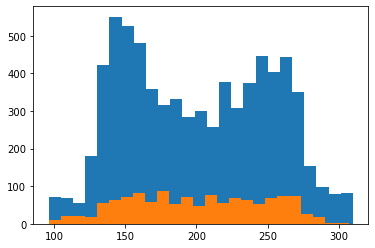

In [39]:
plt.hist(filtered_low['average_montly_hours'], bins=25); #Выборка A
plt.hist(filtered_high['average_montly_hours'], bins=25);  #Выборка B

Отвергаем гепотезу, что чем больше работаешь, тем больше получаешь. ЗП от этого не зависит.

8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): 10
- Доля сотрудников с повышением за последние 5 лет 
- Средняя степень удовлетворенности 
- Среднее количество проектов

In [173]:
df_1 = df.pivot_table( index ='left', values = ['satisfaction_level','number_project'],aggfunc = ['mean'], fill_value = 0 , margins = True)
df_1

mean                   
     number_project satisfaction_level
left                                  
0          3.786664           0.666810
1          3.855503           0.440098
All        3.803054           0.612834

In [174]:
df_2 = df.loc[df.promotion_last_5years == 1].pivot_table( index ='left',
values = ['satisfaction_level'],aggfunc = ['count'], fill_value = 0 , margins = True)
df_2.columns = ['Faired_people']
df_2

,Faired_people
left,
0,300
1,19
All,319


In [175]:
df_3 = df.pivot_table( index ='left',
values = ['satisfaction_level'],aggfunc = ['count'], fill_value = 0 , margins = True)
df_3.columns = ['All_people']
df_3

,All_people
left,
0,11428
1,3571
All,14999


In [176]:
df_itog = df_1.join(df_2).join(df_3)
df_itog.columns = ['avg_num','avg_satis','Faired_people','All_people']
df_itog['abs'] = round(df_itog['Faired_people'] / df_itog['All_people'],2) * 100
df_itog


E:\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,avg_num,avg_satis,Faired_people,All_people,abs
left,,,,,
0,3.786664,0.666810,300,11428,3.0
1,3.855503,0.440098,19,3571,1.0
All,3.803054,0.612834,319,14999,2.0


In [179]:
df_itog.columns = ['Проекты, ср.', 'Уровень удвл, ср.',  'Сотр с повышением','Кол-во сотр всего', 'Кол-во сотр c повышением, %']
df_itog

,"Проекты, ср.","Уровень удвл, ср.",Сотр с повышением,Кол-во сотр всего,"Кол-во сотр c повышением, %"
left,,,,,
0,3.786664,0.666810,300,11428,3.0
1,3.855503,0.440098,19,3571,1.0
All,3.803054,0.612834,319,14999,2.0


Получается, то уволенные сотрудники брали на себя больше проектов, уровень удовлетворенности у них естественно ниже, повышали их реже. Хотя в этой компании добится повышения крайне тяжело.


9. Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки

In [75]:
df = df [['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
from sklearn.model_selection import train_test_split
df_class = df.left
X_train, X_test, y_train, y_test = train_test_split(df, df_class, test_size=0.25)

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [77]:
lda = LinearDiscriminantAnalysis()

In [78]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [79]:
lda.predict(X_test)

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [80]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [81]:
result

,left,Unnamed 0
10668,0.0,NaN
13823,0.0,NaN
3631,0.0,0.0
12664,1.0,NaN
1171,1.0,0.0
...,...,...
11517,0.0,NaN
8666,0.0,NaN
2068,0.0,0.0
8148,0.0,NaN


In [82]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(y_test, lda.predict(X_test))

0.7637333333333334

Качество модели неплохое, но и очень точной назвать ее нельзя.